In [1]:
%pylab inline
import tensorflow as tf
from keras.datasets import cifar10

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


## Data

In [5]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x.astype('float32')/255.
train_y = train_y.astype('float32')

print('Train x Shape:', train_x.shape)
print('Train y Shape:', train_y.shape)

Train x Shape: (50000, 32, 32, 3)
Train y Shape: (50000, 1)


## Model

원본 이미지를 reshape으로 flatten하게 만든뒤 다시 복원합니다.<br>
이때 다시 원본이미지로 깨지지 않고 제대로 복원되는지 확인합니다.

In [2]:
# Test Reshape 
test_input1 = tf.placeholder('float', shape=(None, 32, 32, 3), name='TestInput')
test_input2 = tf.reshape(test_input1, [-1, 3072])
test_input3 = tf.reshape(test_input2, [-1, 32, 32, 3])

## Tensorflow Session Initialization

In [3]:
# Initialization
init_op = tf.global_variables_initializer()
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.4, allow_growth=True)

sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(init_op)

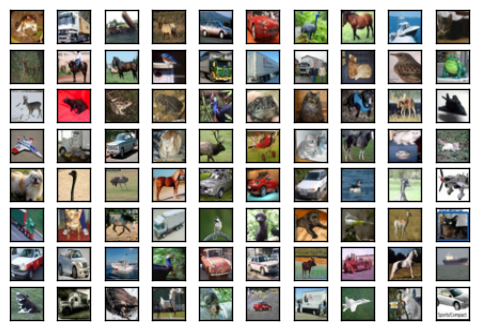

In [7]:
def display(images, size=80):
    for i in range(size):
        ax = subplot(size/10, 10, i+1)
        ax.imshow(images[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# Test Tensorflow Reshape function
test_images = sess.run(test_input3, feed_dict={test_input1: train_x[:80]})
display(test_images)